In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [4]:
data2 = pd.read_csv('../task2_data/task2_en_training.tsv', sep='\t')[['class', 'tweet']]
data3 = pd.read_csv('../task3_data/task3_training.tsv', sep='\t')[['type', 'tweet']]
data2

class                                              tweet
0          0                depression hurts, cymbalta can help
1          0  @jessicama20045 right, but cipro can make thin...
2          0         @fibby1123 are you on paxil .. i need help
3          0  @redicine the lamotrigine and sjs just made ch...
4          0  have decided to skip my #humira shot today. my...
...      ...                                                ...
20539      1  @hornetweb my mri scan shows when it happens b...
20540      1  remember 2003. vioxx costs $65m to ontario dru...
20541      1  asians are at higher risk for severe allergic ...
20542      1  5. so what caused the #estrogen surges in #nuv...
20543      1  @twittalesskels 😂😂😂😂 i'm high off this tamiflu...

[20544 rows x 2 columns]

In [5]:
from sklearn.utils import shuffle
data3 = shuffle(data3)

print(data3[:5])
print()
print(data3['tweet'][453])

     type                                              tweet
1100  NaN  if you or a loved one has experienced severe s...
817   ADR  @jameetmiller i didn't have side effects when ...
757   NaN  @abdulhabiba hope u are fine now. just finishe...
61    NaN  @charlienicola85 someones said can happen whil...
1444  ADR  does anyone know if the #weight gain is less i...

rt @ocd_guy: restless leg syndrome is bad tonight.  damn you fluoxetine.


In [6]:
data3.rename(columns={"type": "class", "B": "c"}, inplace=True)
data3['class'] = data3["class"].fillna(0)
data3 = data3.replace('ADR', 1)
data3

class                                              tweet
1100      0  if you or a loved one has experienced severe s...
817       1  @jameetmiller i didn't have side effects when ...
757       0  @abdulhabiba hope u are fine now. just finishe...
61        0  @charlienicola85 someones said can happen whil...
1444      1  does anyone know if the #weight gain is less i...
...     ...                                                ...
796       0  the fluoroquinolone syndrome &lt;-have you exp...
669       1  also my kidneys have been swollen ever since i...
2094      0  never take a large quantity of vyvanse at nigh...
1         0  happy for wellbutrin; has similar effects as a...
1948      1    trazodone hangovers are the worst, though. sigh

[2246 rows x 2 columns]

Text(0.5, 1.0, 'Number of labeled messages')

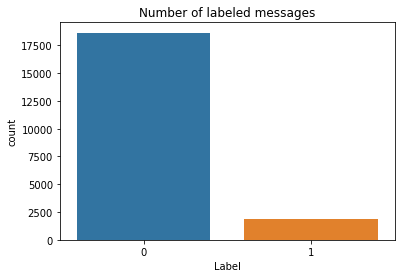

In [7]:
#Understand the distribution better.
# 0 meand NO ADR, 1 ADR exists
sns.countplot(data2['class'])
plt.xlabel('Label')
plt.title('Number of labeled messages')

Text(0.5, 1.0, 'Number of labeled messages')

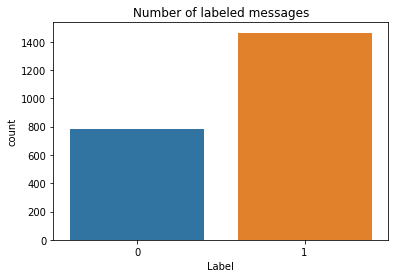

In [8]:
#Understand the distribution better.
# 0 meand NO ADR, 1 ADR exists
sns.countplot(data3['class'])
plt.xlabel('Label')
plt.title('Number of labeled messages')

In [5]:
def difference_in_tweets(d1, d2, name):
    d1 = set(d1[name].to_list())
    d2 = set(d2[name].to_list())
    print(f'Size of d1:\t', len(d1))
    print(f'Size of d2:\t', len(d2))
    
    diff_not_in_d1 = d2.difference(d1)
    diff_not_in_d2 = d1.difference(d2)
    
    not_in_d1_in_d2 = len(diff_not_in_d1)
    not_in_d2_in_d1 = len(diff_not_in_d2)
    
    print('Not in d2:\t',not_in_d2_in_d1)
    print('Not in d1:\t',not_in_d1_in_d2)
    print('Intercept:\t', len(d2)-not_in_d1_in_d2)
    
    venn2([d1,d2], set_labels = ('d1 group', 'd2 group'))
    plt.show()

Size of d1:	 20216
Size of d2:	 1812
Not in d2:	 19265
Not in d1:	 861
Intercept:	 951


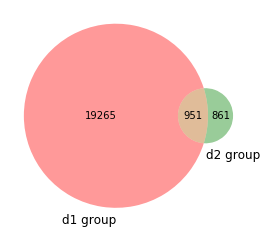

In [6]:
difference_in_tweets(data2, data3, 'tweet')

In [7]:
# наполним data3_not_in_data2 -> data2


not_in_data2 = set(data3['tweet']).difference(set(data2['tweet'].to_list()))
data2_extended = data2['tweet'].to_list() + list(not_in_data2)
data2_extended = pd.DataFrame({'tweet':data2_extended})
data2_extended

tweet
0                    depression hurts, cymbalta can help
1      @jessicama20045 right, but cipro can make thin...
2             @fibby1123 are you on paxil .. i need help
3      @redicine the lamotrigine and sjs just made ch...
4      have decided to skip my #humira shot today. my...
...                                                  ...
21400  tysabri infusion #54 yesterday. made me feel t...
21401  seroquel census: "did we kiss?" (notes i scrib...
21402  i've had no appetite since i started on prozac...
21403  rt @vyvansethoughts: @the_ignorable hungover s...
21404  02.20 day 19 rivaroxaban diary woken up with p...

[21405 rows x 1 columns]

In [8]:
df_outer = pd.merge(data2, data3, how='outer').drop_duplicates()
df_outer.to_csv('../task2_data/data2_ex.csv')
df_outer

class                                              tweet
0          0                depression hurts, cymbalta can help
10         0  @jessicama20045 right, but cipro can make thin...
11         0         @fibby1123 are you on paxil .. i need help
12         0  @redicine the lamotrigine and sjs just made ch...
13         0  have decided to skip my #humira shot today. my...
...      ...                                                ...
22794      1  @doctormcpa  had my doctor attempted to treat ...
22795      1  @wayne386 they probably would have offered me ...
22796      0  @marcuspicture #enbrel alwys works better 4 me...
22797      0  apparently i'm sexually attracted to women who...
22798      1  not hungry but eating anyway. thank you quetia...

[21147 rows x 2 columns]

In [9]:
df = pd.read_csv('../task2_data/data2_ex.csv')[['class', 'tweet']]
df

class                                              tweet
0          0                depression hurts, cymbalta can help
1          0  @jessicama20045 right, but cipro can make thin...
2          0         @fibby1123 are you on paxil .. i need help
3          0  @redicine the lamotrigine and sjs just made ch...
4          0  have decided to skip my #humira shot today. my...
...      ...                                                ...
21142      1  @doctormcpa  had my doctor attempted to treat ...
21143      1  @wayne386 they probably would have offered me ...
21144      0  @marcuspicture #enbrel alwys works better 4 me...
21145      0  apparently i'm sexually attracted to women who...
21146      1  not hungry but eating anyway. thank you quetia...

[21147 rows x 2 columns]

In [10]:
df = pd.read_csv('../task2_data/data2_ex_fasttext.csv')[['class', 'tweet']]
df

class                                              tweet
0     __label__0  [-0.00690659 -0.00405198 -0.0092874   0.007374...
1     __label__1  [ 0.04577886  0.02113134  0.05100529 -0.045606...
2     __label__1  [ 0.05454718  0.0261909   0.06481628 -0.054450...
3     __label__1  [ 7.94227328e-03  5.42319752e-03  9.52784903e-...
4     __label__1  [ 1.47919236e-02  7.10971467e-03  1.89140476e-...
...          ...                                                ...
2211  __label__0  [-0.02289076 -0.01105881 -0.02761636  0.021970...
2212  __label__1  [ 8.45139101e-03  5.57710323e-03  1.65235195e-...
2213  __label__1  [ 0.01696164  0.00884592  0.01731879 -0.015061...
2214  __label__0  [-0.01862165 -0.00593835 -0.0206842   0.021820...
2215  __label__1  [ 0.01144109  0.00588221  0.01211016 -0.011509...

[2216 rows x 2 columns]

In [15]:
df1 = pd.read_csv('../task3_data/task3_training.tsv', sep='\t')[['type', 'tweet']]
df1 = df1.fillna(0)
df1 = df1.replace('ADR', 1)
df1 = df1.iloc[np.random.permutation(len(df1))]

df2 = pd.read_csv('../task3_data/task3_validation.tsv', sep='\t')[['type', 'tweet']]
df2 = df2.fillna(0)
df2 = df2.replace('ADR', 1)
df2 = df2.iloc[np.random.permutation(len(df2))]
df2 = df2.dropna()

#перезапись файлов
df1.to_csv('../task3_data/task3_training_01.csv')
df2.to_csv('../task3_data/task3_validation_01.csv')

In [20]:
df3 = pd.merge(df1, df2, how='outer').drop_duplicates()
df3.rename(columns={'type':'class'}, inplace=True)
df3.to_csv('../task2_data/data2_ex.csv')
df3

class                                              tweet
0         1  vyvanse makes my brain crazier than it already...
1         0  just took my zyprexa and lithium. hahaha. and ...
2         0  rivaroxaban diary day 22 then add 1 drug at a ...
3         1  does anyone on #tysabri get flu iike symptoms,...
7         1  just woke up from a 14 hour nap thank u fluoxe...
...     ...                                                ...
2845      0         @textsurgery paxil? more like paxchill. 8)
2846      0  rt @escardio: dronedarone not recommended for ...
2847      1  please be careful when withdrawing from any an...
2848      1  i need help twitter. i was gradually coming of...
2849      0  @ph_tariq u sure know fluoxetine..to my surpri...

[2216 rows x 2 columns]

In [24]:
df4 = pd.merge(data2, df3, how='outer').drop_duplicates()
df4.to_csv('../task2_data/data2_ex.csv')
df4

class                                              tweet
0          0                depression hurts, cymbalta can help
5          0  @jessicama20045 right, but cipro can make thin...
6          0         @fibby1123 are you on paxil .. i need help
7          0  @redicine the lamotrigine and sjs just made ch...
8          0  have decided to skip my #humira shot today. my...
...      ...                                                ...
21703      0  rt @15stephen15: #todolist 1-finish throat loz...
21704      0  me: how is your depression now that you�re on ...
21705      1  rt @ianibbo: finding out i'm allergic to fluox...
21706      0  @theantimyth @crossfitchemist unexpected and p...
21707      0  rt @escardio: dronedarone not recommended for ...

[21381 rows x 2 columns]

Size of d1:	 20216
Size of d2:	 2215
Not in d2:	 19067
Not in d1:	 1066
Intercept:	 1149


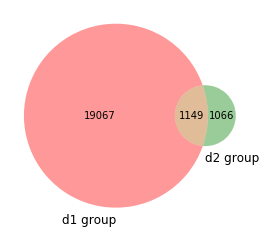

In [25]:
difference_in_tweets(data2, df3, 'tweet')